In [7]:
import numpy as np
import matplotlib.pyplot as plt
import bemcs
import GF

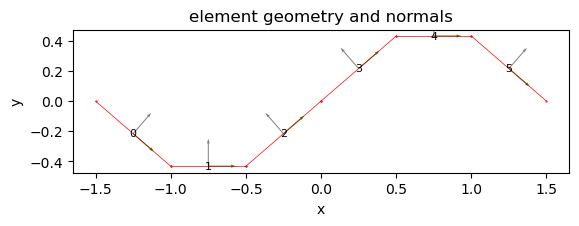

In [8]:
Lscale = 1.5
npts = 7

xvals = np.linspace(-Lscale, Lscale, npts)
yvals = 0.5 * np.sin(2 * np.pi * xvals / 2 / Lscale)

els = bemcs.initialize_els()
els.x1 = xvals[0:-1]
els.x2 = xvals[1:]
els.y1 = yvals[0:-1]
els.y2 = yvals[1:]
bemcs.standardize_els_geometry(els, reorder=False)
bemcs.plot_els_geometry(els)
n_els = len(els.x1)

# provide connectivity matrix and store in els()
conmatrix = np.zeros((n_els - 1, 2))
for i in range(0, n_els - 1):
    conmatrix[i, :] = np.array([i, i + 1])

els.conmatrix = conmatrix
els.xc = els.x_centers[conmatrix[:, 0].astype(int)]
els.yc = els.y_centers[conmatrix[:, 0].astype(int)]

# compute singularity-free Greens functions
nx_obs = 100
ny_obs = 50
x_obs = np.linspace(-2, 2, nx_obs)
y_obs = np.linspace(-1, 1, ny_obs)
x_obs, y_obs = np.meshgrid(x_obs, y_obs)
xo = x_obs.flatten().reshape(-1, 1)
yo = y_obs.flatten().reshape(-1, 1)

K_sx, K_sy, K_u = GF.get_kernels_linforce(xo, yo, els, conmatrix)

In [9]:
# provide force vector
forcevector = np.zeros((n_els - 1, 1))
# forcevector = np.random.rand(n_els - 1, 1)
forcevector[(1, 2, 3, 4), 0] = np.array([1, 0, 1, 0])
lincoeffs = GF.coeffs_from_GFcoeffs(els, conmatrix, forcevector)

# compute displacements and stress components
u = K_u @ forcevector
sx = K_sx @ forcevector
sy = K_sy @ forcevector

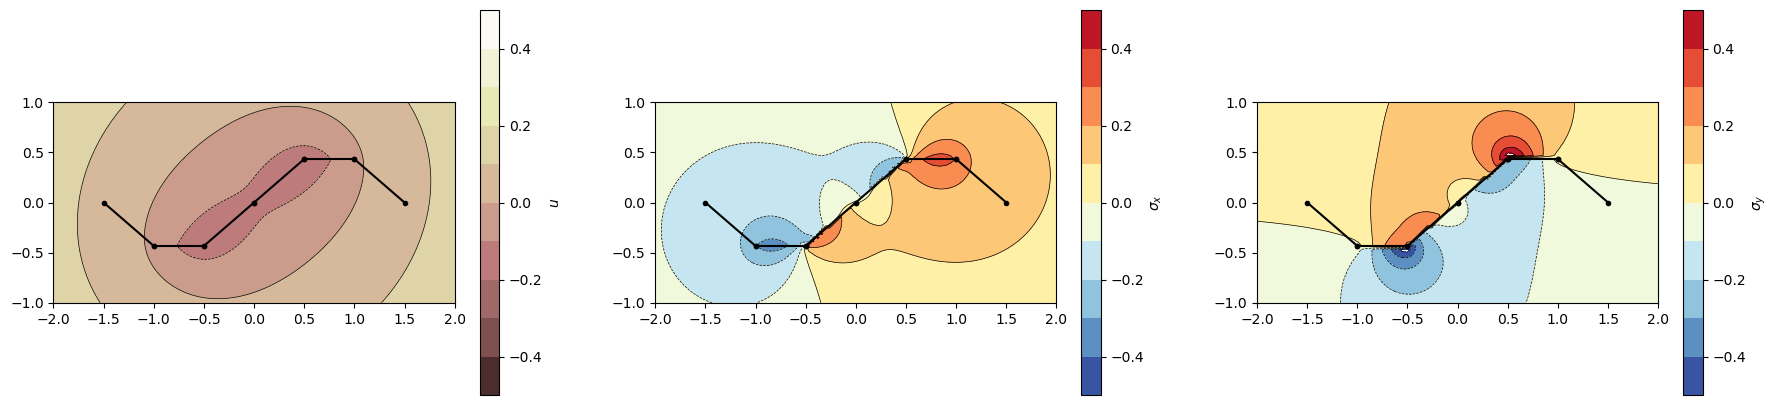

In [10]:
# plot displacements and stresses
plt.figure(figsize=(22, 5))
plt.subplot(1, 3, 1)
toplot = u.reshape(ny_obs, nx_obs)
maxval = 0.5
minval = -maxval
levels = np.linspace(minval, maxval, 11)
plt.contourf(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    cmap="pink",
    vmin=minval,
    vmax=maxval,
    levels=levels,
)
for i in range(n_els):
    plt.plot([els.x1[i], els.x2[i]], [els.y1[i], els.y2[i]], "k.-")
plt.colorbar(label="$u$")
plt.contour(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    colors="k",
    levels=levels,
    linewidths=0.5,
)
plt.gca().set_aspect("equal", adjustable="box")

plt.subplot(1, 3, 2)
toplot = sx.reshape(ny_obs, nx_obs)
maxval = 1.0 / 2
minval = -maxval
levels = np.linspace(minval, maxval, 11)
plt.contourf(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    cmap="RdYlBu_r",
    vmin=minval,
    vmax=maxval,
    levels=levels,
)
for i in range(n_els):
    plt.plot([els.x1[i], els.x2[i]], [els.y1[i], els.y2[i]], "k.-")
plt.colorbar(label="$\sigma_x$")
plt.contour(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    colors="k",
    levels=levels,
    linewidths=0.5,
)
plt.gca().set_aspect("equal", adjustable="box")

plt.subplot(1, 3, 3)
toplot = sy.reshape(ny_obs, nx_obs)
maxval = 1.0 / 2
minval = -maxval
levels = np.linspace(minval, maxval, 11)
plt.contourf(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    cmap="RdYlBu_r",
    vmin=minval,
    vmax=maxval,
    levels=levels,
)
plt.colorbar(label="$\sigma_y$")
plt.contour(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    colors="k",
    levels=levels,
    linewidths=0.5,
)
for i in range(n_els):
    plt.plot([els.x1[i], els.x2[i]], [els.y1[i], els.y2[i]], "k.-")

plt.gca().set_aspect("equal", adjustable="box")
plt.show()